# OLLA Pseudo-code

Here is the way I want to structure OLLA. 

In [1]:
# Import obligatory packages.

import numpy as np
import matplotlib.pyplot as plt 
import xarray as xr
import glob

from getStats import getStats
from getForcingFunctions import getForcingNetCDF
from getOLLA import getOLLA

In [2]:
# Import files into current terminal.

PATH="/data/keeling/a/adammb4/SGP_proj_2021/DATA/"
precip_data=glob.glob(PATH+"SGP_precip*")
rad_data = glob.glob(PATH+"SGP_Best*")

#hum_data = glob.glob(PATH+"entirely different.nc")
#temp_data = glob.glob(PATH+"sheik.nc")

#ds1 = xr.open_dataset(rad_data[0])
#ds2 = xr.open_dataset(precip_data[0])

#rad = ds1["BestEstimate_down_short_hemisp"].values
#prec = ds2["precip"].values

#fig, ax = plt.subplots(1, figsize=(14,10))

#ax.plot(rad)
#ax.set_ylim((-100,100))

In [3]:
# Send files to statistics program to generate relevant statistical quantities.

# Data variable names are "precip" and "BestEstimate_down_short_hemisp" for precipitation and radiation, respectively.
# This has been updated IN getStats.py. 

threshold = 0

stats_array = getStats(rad_data, precip_data, threshold)

stats_array

5
132480
132480
131040
132480
132480


array([3.46315521e+02, 1.29007507e+03, 4.18045471e+02, 4.84291086e-05,
       1.74090033e-03, 3.19336466e-02, 2.79184049e-01])

In [4]:
# Pass resulting statistical quantities to a program that returns a red forcing .nc that is calibrated to said 
# statistical quantities; also pass the filename for ease of reference in next step

tot_years = 2
filename = "SGP_synth_20sum"

getForcingNetCDF(tot_years, stats_array, PATH+filename+".nc")

# THIS IS SAVED TO PATH ABOVE NOT TO LOCAL DIRECTORY

[0.038699375672300335, 0.8550693307904299, 3.0016683555635355, 0.005048177483712278, 0.010427370228102206, 0.0924079177777165, 0.0032092077195772168, 0.013621457003718484, 0.07120499619375815, 0.13305656707981012, 0.7232051736378783, 0.010495457566324431, 0.04461316935782733, 0.01609529252467298, 0.06700876704053971, 0.018078565441843813, 0.11986137960406601, 0.4140582134635908, 0.3549611251657051, 0.06066807885424601, 0.020775916544487984, 0.11050108374821596, 0.06450894677971689, 0.005052928046641308, 0.6842123785473845, 0.0007165849117469257, 0.052124974341749, 3.750757350666505e-05, 0.007039179567198893, 0.22833598939099473, 0.019714016733965885, 0.08749858699411998, 0.4874112785687474, 0.11060308017633355, 0.14396437299488765, 1.0466736855595025e-07, 0.1877088967590356, 0.03708323768205014, 0.07108203994237827, 0.17274558716844604, 0.4871796985685806, 0.09645583881881943, 1.4459689078639395, 1.7028802105245773e-06, 0.3658646469861745, 0.044614151284230644, 0.00036530100170577404, 

In [5]:
# Import .nc as forcing

forcing = glob.glob(PATH+filename+".nc")

#ds = xr.open_dataset(forcing[0])
#forcing4 = ds["F_solar"].values
#plt.plot(forcing4[:,0])
#plt.xlim(0,1440*2)

In [6]:
# Send forcing information to OLLA

# Might need for loop situation here, but basic idea is 

temp_array, mois_array = getOLLA(forcing)

'\nax[1].plot(temp_array[:,1])\n\nax[2].plot(temp_array[:,2])\n\nax[3].plot(temp_array[:,3])\n\nax[4].plot(temp_array[:,4])\n'

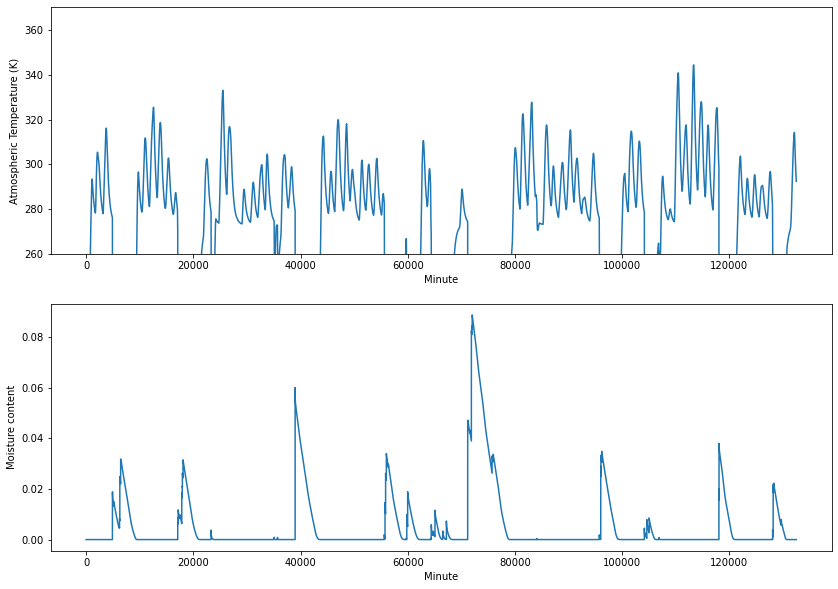

In [8]:
# Print & plot the results from OLLA

# Generic plotting business

fig, ax = plt.subplots(2, figsize=(14,10))

ax[0].plot(temp_array[:,0])
ax[0].set_ylim((260, 370))
ax[0].set_ylabel(r"Atmospheric Temperature (K)")
ax[0].set_xlabel(r"Minute")

ax[1].plot(mois_array[:,0])
ax[1].set_ylabel(r"Moisture content")
ax[1].set_xlabel(r"Minute")
#ax[1].set_ylim((0,10**(-4)))
"""
ax[1].plot(temp_array[:,1])

ax[2].plot(temp_array[:,2])

ax[3].plot(temp_array[:,3])

ax[4].plot(temp_array[:,4])
"""